# Hypothesis Testing: t-Tests

## Objectives

- Understand how Type 1 & Type 2 errors can be made in hypothesis tests
- Perform a Student's t-test and interpret the results

In [1]:
# Imports
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## We All Make Mistakes

Statistics is a field of imperfect knowledge: we don't know the **_truth_**, we use what we know to make informed guesses/inferences.

We make mistakes ¯\\\_(ツ)\_/¯ <!--markdown shrug-->

But it's important to know _what kind_ of mistakes we can make in our process and recognize _how frequently_ we might make those mistakes.

It would help if we go over some terminology to help us discuss this types of errors.

When we get it **right** we have **true positives** and **true negatives**. When we get it **wrong** we either have a **false positive** or a **false negative**. 

![basic confusion matrix](images/type-1-and-type-2-errors.png)


**Positive** in this sense refers to the thing we're trying to detect, the presence of some factor that leads to a statistically significant difference (posited by our alternative hypothesis).

**Negative** in this sense refers to the status quo, that there is no factor leading to a stastically significant difference (what we capture within the null hypothesis).

When we get it wrong:

> **False Positives:  Type 1 Errors** - Predicting the presence of some factor (rejecting the null hypothesis) when in fact it _IS NOT_ there (the null hypothesis should not be rejected) 
>
> **False Negatives: Type 2 Errors** - Failing to predict the presence of some factor (failing to reject the null hypothesis) when in fact it _IS_ there (the null hypothesis should be rejected)

Thus, when we get it right:

> **True Positives:**  Predicting the presence of some factor (rejecting the null hypothesis) when in fact it _IS_ there (the null hypothesis should be rejected)
>
> **True Negatives:**  Failing to predict the presence of some factor (failing to reject the null hypothesis) when in fact it _IS NOT_ there (the null hypothesis should not be rejected)

We've discussed this already a bit - when we set our significance level ($\alpha$), we're defining our tolerance for a Type 1 Error. For example, when we set $\alpha = .05$, we're saying we're okay with a 5% chance of committing a Type 1 Error.

The same goes for Type 2 Errors, typically denoted with $\beta$, which is typically discussed as **statistical power** ($1 - \beta$): when we set the power of our test at 80% ($\beta = .2$ - a fairly common value, we'll discuss this more in the next lecture though!), we say we're okay with a 20% chance of committing a Type 2 Error.

## Visualizing The Errors

We can think of a hypothesis test as comparing two normal distributions (or $t$-distributions or whichever test we're doing). 

There's the sample's distribution and the comparison's distribution given by the null hypothesis (aka the population in a one-sample test).

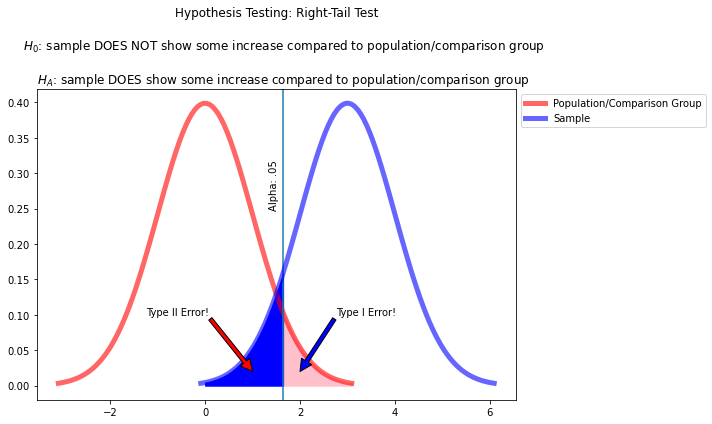

In [2]:
# Visulization of two samples being compared with one another
fig, ax = plt.subplots(figsize=(10,6))

# Plot Group A
y = np.linspace(stats.norm(0, 1).ppf(0.001),
             stats.norm(0, 1).ppf(0.999), 100)

alpha = stats.norm(0, 1).ppf(0.95)

ax.plot(y, stats.norm(0, 1).pdf(y), 'r-', lw=5, alpha=0.6, label='Population/Comparison Group')
ax.axvline(alpha)

px = np.arange(stats.norm(0, 1).ppf(0.95), stats.norm(0, 1).ppf(0.999), 0.001)
ax.fill_between(px, stats.norm(0, 1).pdf(px), color = 'pink')

# Plot Group B
x = np.linspace(stats.norm(3, 1).ppf(0.001),
             stats.norm(3, 1).ppf(0.999), 100)

ax.plot(x, stats.norm(3, 1).pdf(x), 'b-', lw=5, alpha=0.6, label='Sample')


px = np.arange(stats.norm(0, 1).ppf(0.5),stats.norm(0, 1).ppf(0.95), 0.001)
ax.fill_between(px, stats.norm(3, 1).pdf(px), color='blue')


ax.legend(bbox_to_anchor =(1, 1))

ax.set_title("""Hypothesis Testing: Right-Tail Test\n
    $H_0$: sample DOES NOT show some increase compared to population/comparison group\n
    $H_A$: sample DOES show some increase compared to population/comparison group""")

ax.text(1.35, 0.25, 'Alpha: .05', rotation=90)

ax.annotate('Type I Error!', xy=(2, 0.02),
            xytext=(2.75, 0.1), arrowprops={'facecolor': 'blue'})
ax.annotate('Type II Error!', xy=(1, 0.02),
            xytext=(-1.25, 0.1), arrowprops={'facecolor': 'red'})

plt.tight_layout()

## Beyond Normal: $t$-Tests

First up, let's recap the steps to conduct a hypothesis test:


1. State alternative hypothesis (and null)
2. Decide your test     
3. Specify significance level ($\alpha$) 
4. Calculate test statistic 
5. Translate (either test statistic into a p-value or significance level into a significance threshold)
6. Interpret

### $z$-tests vs $t$-tests

<img src="images/z_or_t_test.png" width="500">

We'll typically assume that our continuous variables come from normal distributions. But if we have a small sample size or don't know the population standard deviation, we have to make a *correction* to  the normal distribution. This is what the $t$-test effectively does for us by using a $t$-distribution over the normal distribution.

As we saw previously, the $t$-distribution changes based on the degrees of freedom (number of data point in the sample). As the number of points increase, we approach the normal distribution.

## Performing a One-Sample $t$-Test

A more formal definition:

For small sample sizes or samples with unknown population standard deviation, the _test statistic_ of the sample mean is given by the t-statistic,

$$ t = \frac{\bar{x} - \mu}{s/\sqrt{n}} $$

Here, $s$ is the sample standard deviation, which is used to estimate the population standard deviation, $\bar{x}$ is the sample mean, $\mu$ is the population mean, and $n$ is the sample size.

The one-sample t-test tries to answer the question: **how likely we are to observe a t-statistic as extreme as our sample's given the null hypothesis that the sample and population have the same mean?**

Luckily, _if_ our sample is an array-like form of data in python, we can do this in the stats library!

`stats.ttest_1samp(sample_array, mu)`

## Without `ttest_1samp`: Espresso Consistency

A coffee shop relocates from Manhattan to Brooklyn and wants to make sure that their lattes are consistent before and after their move. They buy a new machine and hire a new barista. In Manhattan, lattes are made with 4 oz of espresso. A random sample of 25 lattes made in their new store in Brooklyn shows a mean of 4.6 oz of espresso with a standard deviation of 0.22 oz. Are their lattes different now that they've relocated to Brooklyn? Use a significance level of $\alpha = 0.05$.

**State the null and alternative hypotheses**

- Null: no difference between espresso sizes between locations
- Alternative: lattes made in Brooklyn use a differerent amount of espresson than the other store

two tailed test!

**Perform the test**

In [3]:
# Your code here
pop_mean = 4

sample_mean = 4.6
sample_stdev = .22
sample_size = 25

In [4]:
test_statistic = (sample_mean - pop_mean)/(sample_stdev/np.sqrt(sample_size))
test_statistic

13.63636363636363

In [5]:
p_value = stats.t.sf(abs(test_statistic), df=sample_size-1)*2
p_value

8.48542925590331e-13

In [6]:
alpha=.05

In [7]:
p_value < alpha

True

**Interpret**

- We reject the null hypothesis that the lattes are the same
- BECAUSE p-value is smaller than alpha: extremely unlikely that we'd see this sample if the null hypothesis was true


## With `ttest_1samp`: Food Delivery

It's well known that delivery services in your city are able to deliver food in an average of 26.8 minutes.

You measure the delivery times of ten different restaurants in your neighborhood because you want to know if restaurants in your neighborhoods have the same delivery times as is expected across your city. Set your significance threshold to 0.05. 

In [8]:
delivery_times = [28.4, 23.3, 30.4, 28.1, 29.4, 30.6, 27.8, 30.9, 27.0, 32.8]

**State the null and alternative hypotheses**

- Null: neighborhood delivery times are the same as the rest of your city
- Alternative: neighborhood delivery times are NOT the same

two-sided again!

**Perform the test**

In [9]:
# Code here
mu = 26.8
stats.ttest_1samp(delivery_times, mu)

Ttest_1sampResult(statistic=2.500842367935506, pvalue=0.03381505781838732)

**Interpret**

- p_value is less than alpha
- reject null


## BUT WAIT, THERE'S MORE

More samples, that is!

Up to this point, we've been comparing one sample to some assumed population values. But what if we want to compare two samples?

### Enter: Two-sample t-tests

There are **two types** of two-sample t-tests: paired and independent (unpaired) tests.

#### Paired tests:

How is a sample affected by a certain treatment? When the individuals in the sample remain the same and you compare how they change after treatment or some kind of change, you use a paired two-sample t-test. In other words, we're comparing **one sample that has been tested twice** (repeated measures) or when there are two samples that have been matched or "paired".

The calculation here is the same as for our typical t-statistic: 

$$ t = \frac{x_1 - x_2}{s/\sqrt{n}} $$


_If_ our two paired samples are array-like forms of data in python, we can do this in the stats library!

```
stats.ttest_rel(paired_v_1, paired_v_2)
```

#### Independent two-sample tests

When we compare **two different, unrelated samples** to each other, we use an independent (or unpaired) two-sample t-test.

The test statistic (t-statistic) for an unpaired two-sample t-test is _slightly different_ than the test statistic for the one-sample t-test.

Assuming equal variances, the test statistic for a two-sample t-test is given by:

$$ t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{s^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}$$

where $\bar{x_1}$ is the mean of the first sample, $\bar{x_2}$ is the mean of the second sample, $n_1$ is the sample size of the first sample, and $n_2$ is the sample size of the second sample.

Then, $s^2$ is the pooled sample variance, $ s^2 = \frac{\sum_{i=1}^{n_1} \left(x_i - \bar{x_1}\right)^2 + \sum_{j=1}^{n_2} \left(x_j - \bar{x_2}\right)^2 }{n_1 + n_2 - 2} $ 

NOTE: An independent two-sample t-test for samples of size $n_1$ and $n_2$ has $(n_1 + n_2 - 2)$ degrees of freedom.


_If_ our two paired samples are array-like forms of data in python, we can do this in the stats library!

```
stats.ttest_ind(sample_1, sample_2)
```

And luckily, even if we don't have our samples as array-like forms of data, there's a function to just pass in our sets of sample statistics!

```
stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2)
```

### Equal Variance?

If your two independent samples have unequal variances and possibly unequal sample sizes, you should be sure to set the `equal_var` argument to `False` when running your test! The default argument is `True`.

(if you care: this changes the test from a [Student's T-Test](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test) to a [Welch's T-Test](https://en.wikipedia.org/wiki/Welch%27s_t-test))

### A Note on T-Tests in the Stats Library:

The output of a t-test in the scipy stats library (so, `ttest_1samp`, `ttest_rel`, `ttest_ind`, etc) is a tuple with two pieces:
- the test statistic
- the p-value

That's right - they go ahead and translate the test statistic into a p-value for you!

#### BUT NOTE!

If you plan to use the p-value provided by the test to compare to the significance level ($\alpha$) you set, I recommend you use the `alternative` argument in the t-test functions to tell it what kind of test you're running: 
- `'two-sided'` tells the stats library you're running a two-tailed test
- `'less'` tells the stats library you're running a left tailed test
- `'greater'` tells the stats library you're running a right tailed test

## Let's Try It!

A sample of 20 data science students from Dr. Venkman's Data Science 101 lecture course showed an average of 80.5 points on the last test, with a standard deviation of 9.9 points. Meanwhile, a sample of 28 students from Dr. Yates's Data Science 101 lecture course showed an average of 86.3 points on the same test, with a standard deviation of 11.2 points. Are Dr. Yates's students performing (significantly) better than Dr. Venkman's? Assume the two student populations have equal variances and use an alpha level of 0.05.

#### What are your null and alternative hypotheses?

- Null: Dr Yates's students are not performing better than Dr Venkman's
- Alternative: Dr Yates's students are performing better!


#### What type of test?

- "performing better" says higher/greater scores - right-tailed test
- two sample independent t test


#### What significance level?

- says .05


#### Run the test!

In [10]:
import scipy
scipy.__version__

'1.7.0'

In [18]:
# Your code here
results = stats.ttest_ind_from_stats(
    mean1 = 80.5,
    std1 = 9.9,
    nobs1 = 20,
    mean2 = 86.3,
    std2 = 11.2,
    nobs2 = 28,
    equal_var=True 
#     alternative='greater' if scipy version >= 1.7
)
results

Ttest_indResult(statistic=-1.8545524566497287, pvalue=0.9649615472692835)

#### Translate? 

- Can use survival function (SF) because right-tailed test


In [19]:
p_value = stats.t.sf(results[0], df=(20+28-2))
p_value

0.9649615472692835

#### Other Way to Translate:

In [22]:
alpha = .05

significance_threshold = stats.t.ppf(1-alpha, df=(20+28-2))
significance_threshold

1.67866041259169

#### Interpret?

- Fail to reject null hypothesis
- Very high chance our data looks different because of randomness not some actual effect


In [20]:
# Or can interpret via code
p_value < .05

False

## Another example, now with data

We have avocado data from two regions: the Northern hemisphere and the Southern hemisphere.

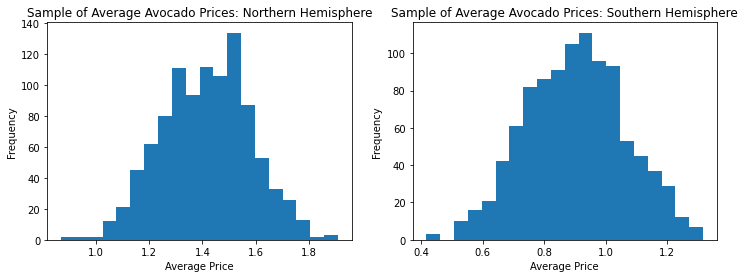

In [23]:
# Run this cell without changes
import pandas as pd

# Load the sample data from each hemisphere
northern_hem = pd.read_csv('data/northern_hemisphere.csv')
southern_hem = pd.read_csv('data/southern_hemisphere.csv')

# Plot histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Average Avocado Prices: Northern Hemisphere')
ax1.set_xlabel('Average Price')
ax1.set_ylabel('Frequency')
ax1.hist(northern_hem['Average Price'], bins=20)

ax2.set_title('Sample of Average Avocado Prices: Southern Hemisphere')
ax2.set_xlabel('Average Price')
ax2.set_ylabel('Frequency')
ax2.hist(southern_hem['Average Price'], bins=20)
plt.show()

We want to know if people in the Southern hemisphere spend **a different amount** on avocados on average than those in the Northern hemisphere.

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

#### What are your null and alternative hypotheses?

- Null:
- Alternative:


#### What type of test?

- 


#### What significance level?

- 


#### Run the test!

In [ ]:
# Your code here

#### Translate? 

- 


#### Interpret?

- 


In [ ]:
# Or can interpret via code

### Two more things!

#### What would a Type 1 Error look like in this context?

- 


#### What would a Type 2 Error look like in this context?

- 


## Recap of Useful Documentation Links for the Scipy Stats Library

- [One Sample T-Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)
- [Two Sample Independent T-Test (with sample data as array-like](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
    - [Two Sample Independent T-Test (from just sample statistics](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html)
- [Two Sample Paired T-Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)